In [1]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
## Load the data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [5]:
# Evaluate the model on the training set
y_train_pred = model.predict(X)
train_accuracy = accuracy_score(y, y_train_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f} %")

Training Accuracy: 81.59 %


In [6]:
# Cross-validation. To get a more reliable estimate of your model's performance:
cv_scores = cross_val_score(model, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean() * 100:.2f} %")

Cross-validation scores: [0.76536313 0.80446927 0.80898876 0.79213483 0.82485876]
Mean CV score: 79.92 %


Confusion matrix: [[492  57]
 [107 235]]


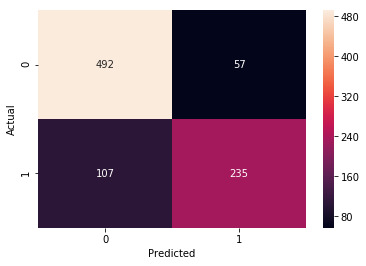

In [7]:
# Confusion Matrix. To understand the types of errors your model is making:
cm = confusion_matrix(y, y_train_pred)

print(f"Confusion matrix: {cm}")

sns.heatmap(cm, annot=True, fmt="d")

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [8]:
# Feature Importance. Analyze which features are most influential in model's decisions.

feature_importance = pd.DataFrame(
    {"feature": X.columns, "importance": model.feature_importances_}
)

feature_importance = feature_importance.sort_values("importance", ascending=False)

print(feature_importance)

      feature  importance
3  Sex_female    0.342297
4    Sex_male    0.284667
0      Pclass    0.215508
2       Parch    0.080406
1       SibSp    0.077122


In [9]:
# RandomizedSearchCV
# Define the parameter distribution
param_dist = {
    "n_estimators": randint(50, 500),
    "max_depth": randint(1, 20),
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11),
    "max_features": ["auto", "sqrt", "log2"],
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,  # use all available cores
)

# Fit the random search object to the data
random_search.fit(X, y)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


Best parameters: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 251}
Best cross-validation score: 0.8080808080808081


In [10]:
model = RandomForestClassifier(
    max_depth=3,
    max_features="sqrt",
    min_samples_leaf=3,
    min_samples_split=2,
    n_estimators=276,
)

model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=276,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
# Cross-validation after tuning
cv_scores_after_tuning = cross_val_score(model, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores_after_tuning}")

cv_scores_after_tuning_mean_cv = cv_scores_after_tuning.mean()

print(f"Mean CV score: {cv_scores_after_tuning_mean_cv * 100:.2f} %")

print(
    f"Mean CV score improvement: {(cv_scores_after_tuning_mean_cv - cv_scores.mean()) * 100:.2f} %"
)

Cross-validation scores: [0.81564246 0.81005587 0.80898876 0.78651685 0.8079096 ]
Mean CV score: 80.58 %
Mean CV score improvement: 0.67 %


In [12]:
# Evaluate the model on the test set
predictions = model.predict(X_test)

output = pd.DataFrame({"PassengerId": test_data.PassengerId, "Survived": predictions})
output.to_csv("submission.csv", index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
